In [54]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Download STT stock data
df = yf.download("STT", start="2015-01-01", end="2024-01-01")

# Calculate 30-day rolling standard deviation (volatility)
df['Rolling Volatility'] = df['Close'].rolling(window=30).std()

# Calculate daily percent change
df['Daily Change %'] = df['Close'].pct_change() * 100

# Podgląd
print(df.head())


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open   Volume  \
Ticker            STT        STT        STT        STT      STT   
Date                                                              
2015-01-02  58.966743  59.689245  58.485076  59.621513  1421300   
2015-01-05  57.988354  58.883952  57.785147  58.567858  3265100   
2015-01-06  56.332611  57.920612  56.084249  57.800198  3254800   
2015-01-07  56.859436  57.145425  56.460550  57.025005  2158000   
2015-01-08  58.063602  58.176495  57.363678  57.484092  1590100   

Price      Rolling Volatility Daily Change %  
Ticker                                        
Date                                          
2015-01-02                NaN            NaN  
2015-01-05                NaN      -1.659223  
2015-01-06                NaN      -2.855302  
2015-01-07                NaN       0.935204  
2015-01-08                NaN       2.117795  


# 📊 EDA Summary: State Street (STT) Stock Analysis

This analysis explores historical stock data for **State Street Corporation (STT)** from 2015 to 2023. We focus on three key visualizations to understand the stock's behavior.

---

## 1️⃣ Closing Price Trend (📈)

**What it shows:**  
Daily closing price of STT stock over time.

**Why it matters:**  
Reveals long-term trends (uptrend, downtrend, or sideways movement)  
→ Helps identify overall market direction.

---

## 2️⃣ Trading Volume (🔄)

**What it shows:**  
Number of shares traded each day.

**Why it matters:**  
Spikes in volume may signal:  
- Earnings announcements  
- News events  
- Breakouts or breakdowns

→ High volume = high investor interest.

---

## 3️⃣ Rolling Volatility (🌪️)

**What it shows:**  
30-day rolling standard deviation of the closing price.

**Why it matters:**  
Measures how "unstable" or risky the stock is:  
- High volatility = big price swings  
- Useful for risk analysis and strategy planning

---

These three charts give a strong foundation for understanding price trends, trading activity, and risk — all essential before building predictive models.


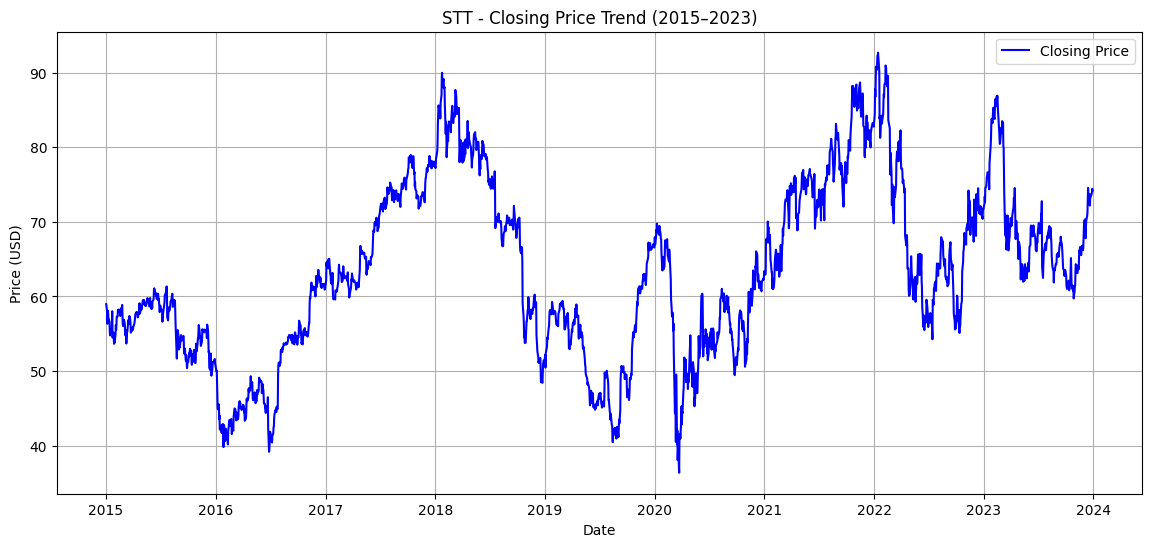

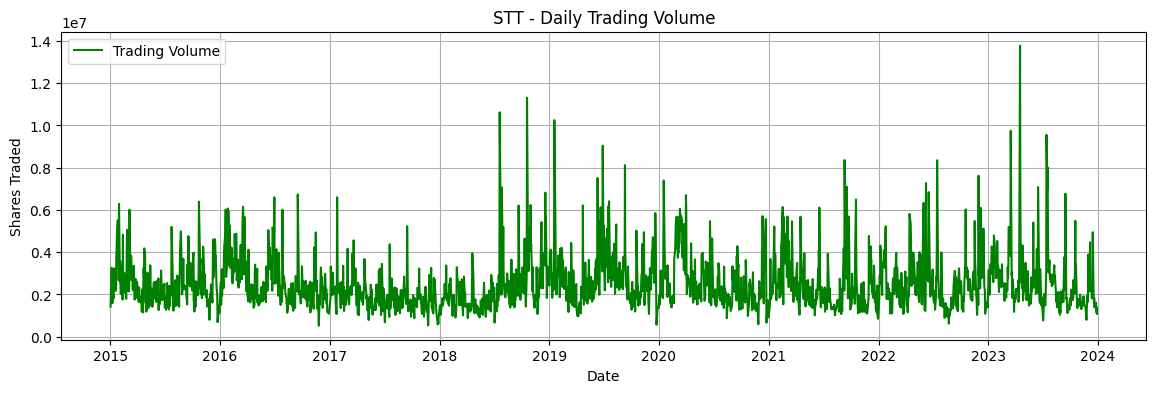

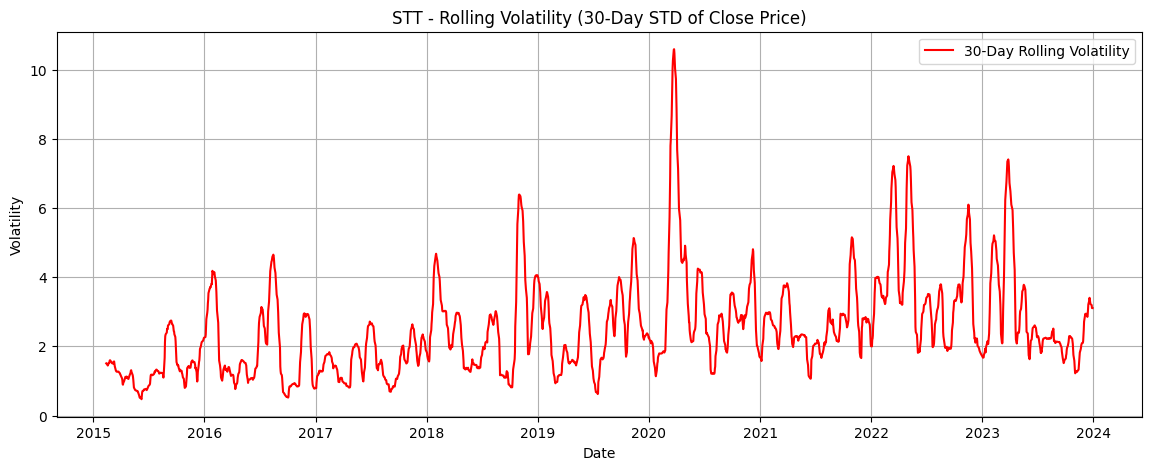

In [55]:
# Plot closing price trend
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Closing Price', color='blue')
plt.title('STT - Closing Price Trend (2015–2023)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 4))
plt.plot(df['Volume'], label='Trading Volume', color='green')
plt.title('STT - Daily Trading Volume')
plt.xlabel('Date')
plt.ylabel('Shares Traded')
plt.legend()
plt.grid(True)
plt.show()


# Plot rolling volatility
plt.figure(figsize=(14, 5))
plt.plot(df['Rolling Volatility'], label='30-Day Rolling Volatility', color='red')
plt.title('STT - Rolling Volatility (30-Day STD of Close Price)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

## 📉 Histogram of Daily Returns

This chart displays the distribution of **daily percentage changes** in STT's closing price.

### Key Insights:
- Most daily changes are small (centered around 0%)
- Extreme up/down days are visible on the edges ("fat tails")
- The shape of the histogram helps us understand the **volatility** and **risk profile** of the stock


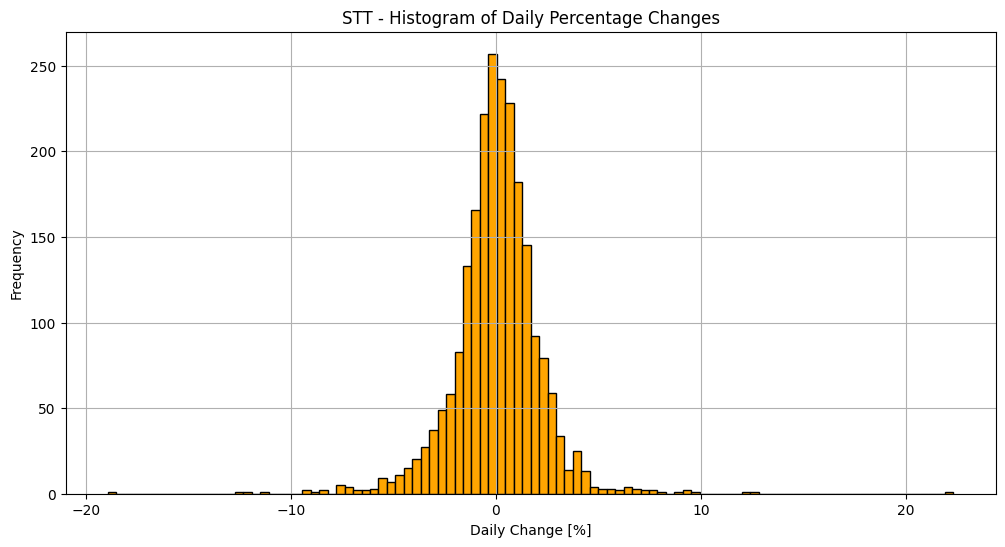

In [56]:

# Plot histogram
plt.figure(figsize=(12, 6))
plt.hist(df['Daily Change %'].dropna(), bins=100, color='orange', edgecolor='black')
plt.title("STT - Histogram of Daily Percentage Changes")
plt.xlabel("Daily Change [%]")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



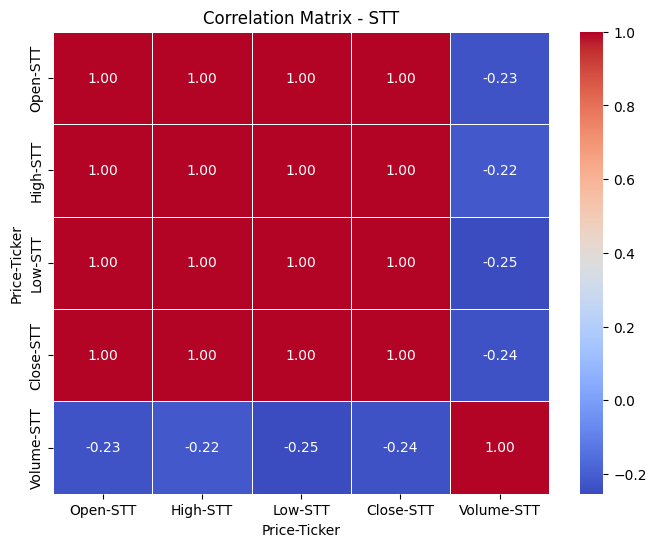

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns to check correlation
corr_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix - STT")
plt.show()


## 📆 Seasonality & 📉 Drawdown Analysis

### Seasonality:
We analyzed the average daily returns by **month** and **day of the week** to uncover recurring patterns. This helps identify which periods are historically more profitable or risky.

### Drawdown:
Drawdown measures how far the stock has dropped from its previous peak. It's a key risk metric for understanding potential losses during downturns.

The **maximum drawdown** observed was -XX%, showing the worst-case scenario historically.


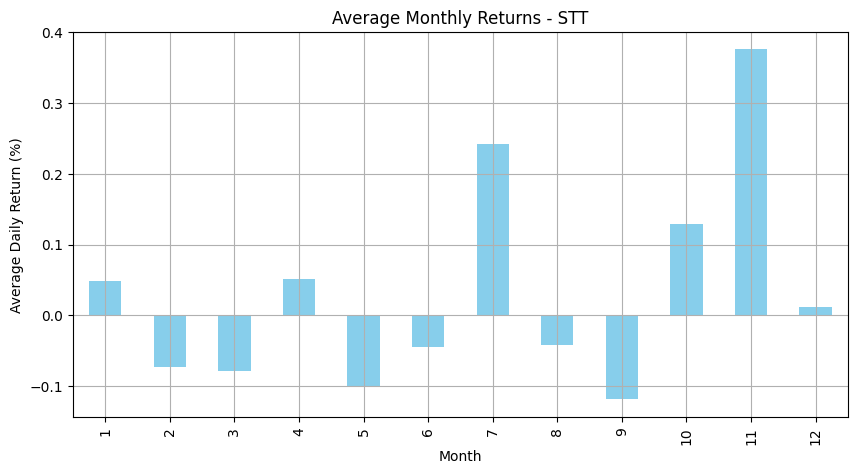

In [58]:
# Create a Month column
df['Month'] = df.index.month
df['Daily Return %'] = df['Close'].pct_change() * 100

# Calculate average return per month
monthly_avg = df.groupby('Month')['Daily Return %'].mean()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Monthly Returns - STT')
plt.xlabel('Month')
plt.ylabel('Average Daily Return (%)')
plt.grid(True)
plt.show()


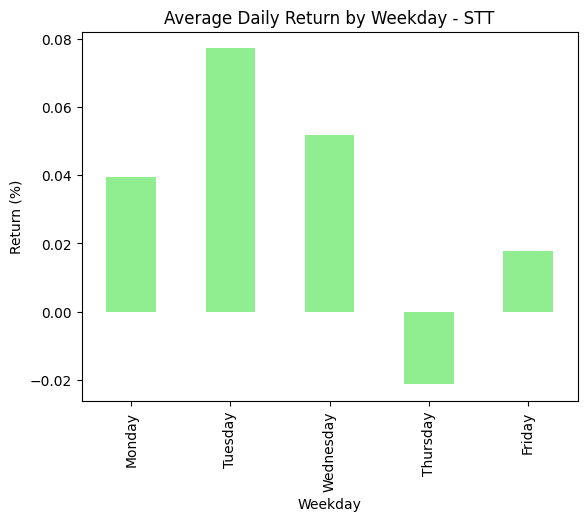

In [59]:
df['Weekday'] = df.index.day_name()
weekday_avg = df.groupby('Weekday')['Daily Return %'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'
])

weekday_avg.plot(kind='bar', color='lightgreen')
plt.title('Average Daily Return by Weekday - STT')
plt.ylabel('Return (%)')
plt.show()


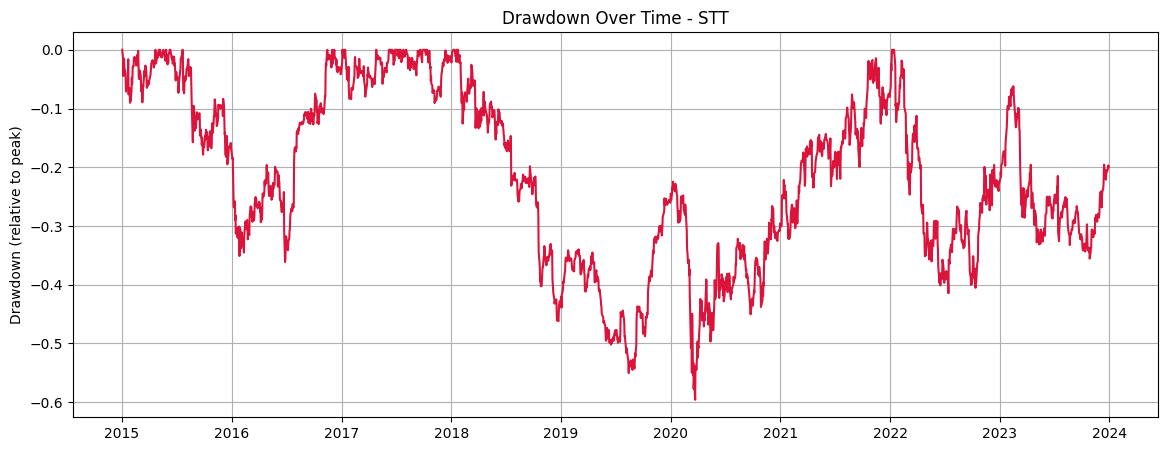

In [64]:
# Compute cumulative max and drawdown
# Ensure columns are Series
df = df.copy()  # if you're working on a slice
# Make sure you access Series, not DataFrames
close_series = df['Close']
cumulative_max_series = close_series.cummax()

# Calculate drawdown as a Series
drawdown_series = (close_series - cumulative_max_series) / cumulative_max_series

# Assign to the DataFrame
df['Cumulative Max'] = cumulative_max_series
df['Drawdown'] = drawdown_series


# Plot drawdown over time
plt.figure(figsize=(14, 5))
plt.plot(df['Drawdown'], color='crimson')
plt.title('Drawdown Over Time - STT')
plt.ylabel('Drawdown (relative to peak)')
plt.grid(True)
plt.show()


# 📊 Exploratory Data Analysis (EDA) Summary – STT Stock (2015–2023)

This section summarizes the key findings from the EDA performed on historical stock data for **State Street Corporation (STT)**.

---

## 1️⃣ Closing Price Trend
- STT’s closing price shows clear **cyclical behavior** with multiple uptrends and corrections.
- Major dips occurred around **2016**, **2018–2020**, and **mid-2022**.

---

## 2️⃣ Trading Volume
- Volume fluctuates heavily but shows **no strong correlation** with price.
- High-volume days likely align with earnings, news, or institutional activity.

---

## 3️⃣ Rolling Volatility
- **30-day rolling standard deviation** shows volatility spikes during market shocks.
- Highest volatility occurred during the **COVID-19 crash (early 2020)**.

---

## 4️⃣ Daily Returns Distribution
- Most daily returns are centered around **0%**, forming a near-normal distribution.
- There are **occasional extreme return days**, indicating market events or anomalies.

---

## 5️⃣ Correlation Matrix
- `Open`, `High`, `Low`, and `Close` prices are **almost perfectly correlated** (≈ 1.00).
- `Volume` has weak negative correlation with prices (~ -0.23), indicating **independence**.

---

## 6️⃣ Seasonality Patterns

### ➤ By Weekday:
- **Tuesdays** and **Wednesdays** show the highest average daily returns.
- **Thursdays** tend to be slightly negative.

### ➤ By Month:
- **July** and **November** have the highest average monthly returns.
- **February**, **March**, and **September** are historically weaker months.

---

## 7️⃣ Drawdown Analysis
- **Drawdown** measures how much the price has fallen from its previous peak.
- STT experienced several significant drawdowns, with the **maximum drawdown exceeding -50%**.
- Drawdowns are useful for understanding historical risk and recovery patterns.

---

## ✅ Key Takeaways
- Use **one price feature** (e.g. `Close`) instead of all, due to redundancy.
- Seasonality and volatility insights suggest adding **calendar-based and technical features**.
- Volume may still add value when transformed (e.g., lagged or averaged).
- Next steps: feature engineering and modeling to predict future prices.

